# Análise de Sentimentos com Dados do Twitter

### O objetivo é criar modelos para a análise de sentimentos utilizando tweets coletados no estado de Minas Gerais
* A base de dados já passou por previo rotulamento dos dados
* Dada uma afirmação existem 3 possibilidades de sentimentos, positivo, negativo e neutro
* Teste com Modelo usando tag de negações
* Teste com Modelo usando Bigrams

In [1]:
# bibliotecas necessárias
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

# 1 Entendendo a BASE DE DADOS

In [2]:
# lendo arquivo
dataset = pd.read_csv('Tweets_Mg.csv', encoding='utf-8')

In [3]:
# vendo as 20 primeiras linhas
dataset.Text.head(20)

0     ���⛪ @ Catedral de Santo Antônio - Governador ...
1     � @ Governador Valadares, Minas Gerais https:/...
2     �� @ Governador Valadares, Minas Gerais https:...
3                           ��� https://t.co/BnDsO34qK0
4     ��� PSOL vai questionar aumento de vereadores ...
5     " bom é bandido morto"\nDeputado Cabo Júlio é ...
6     "..E 25% dos mineiros dizem não torcer para ti...
7     "A gigantesca barba do mal" em destaque no cad...
8     "BB e governo de Minas travam disputa sobre de...
9     "com vcs bh fica pequena!" Belo Horizonte (pro...
10    "Daí a gente visita governador valadares"\n"Qu...
11    "É bonita e é bonita..." \n#latergram #ibituru...
12    "erro desconhecido" é mato! Aliás, é da secret...
13    "La La Land: Cantando Estações" arrasa no Glob...
14    "La La Land: Cantando Estações" arrasa no Glob...
15    "Los abusos, aun en el estado más sólido, son ...
16    "Mesmo sem muito dinheiro no caixa o governo d...
17    "Modelo de segurança será o nosso legado",

In [4]:
# observação de dados em forma tabular
dataset.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# formato do dataset
dataset.shape
# possue  8199 linhas e 26 colunas 

(8199, 26)

In [6]:
# quantidade de observações nulas
dataset.isnull().sum()

Unnamed: 0                      0
Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Observação                   8198
Unnamed: 10                  8199
Unnamed: 11                  8199
Unnamed: 12                  8199
Unnamed: 13                  8199
Unnamed: 14                  8199
Unnamed: 15                  8199
Unnamed: 16                  8199
Unnamed: 17                  8199
Unnamed: 18                  8199
Unnamed: 19                  8199
Unnamed: 20                  8199
Unnamed: 21                  8199
Unnamed: 22                  8199
Unnamed: 23                  8199
Unnamed: 24                  8199
dtype: int64

**Conta a quantidade de linhas de tweets neutros, positivos e negativos**

In [7]:
dataset[dataset.Classificacao=='Neutro'].count()

Unnamed: 0                   2453
Created At                   2453
Text                         2453
Geo Coordinates.latitude      102
Geo Coordinates.longitude     102
User Location                1712
Username                     2453
User Screen Name             2453
Retweet Count                2453
Classificacao                2453
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [8]:
dataset[dataset.Classificacao=='Positivo'].count()

Unnamed: 0                   3300
Created At                   3300
Text                         3300
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                2118
Username                     3300
User Screen Name             3300
Retweet Count                3300
Classificacao                3300
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [9]:
dataset[dataset.Classificacao=='Negativo'].count()

Unnamed: 0                   2446
Created At                   2446
Text                         2446
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                1659
Username                     2446
User Screen Name             2446
Retweet Count                2446
Classificacao                2446
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

<AxesSubplot:>

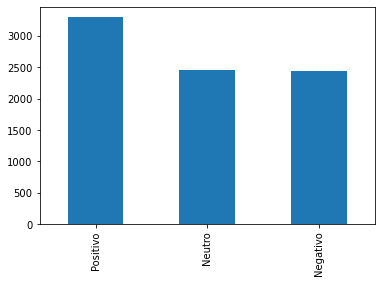

In [10]:
# A base possue; negativos = 2446, positivos =  3300  e neutros = 2453
# de modo gráfico temos:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar')

# 2 Pré - Processamento dos Dados

* Remove linhas duplicadas na base de dados
    - Problema na coleta dos dados.
* Remove Stopwords
* Faz Stemming nos dados (REDUÇÃO DE PALAVRAS FLEXIONADAS - OBTEM O TERMO RAIZ DA PALAVRA)
* Remove caracteres indesejados como links, pontuação etc.

In [11]:
# REMOVE LINHAS DUPLICADAS
dataset.drop_duplicates(['Text'], inplace=True)

In [12]:
dataset.shape

(5765, 26)

**Separando tweets e suas Classes**

In [13]:
tweets = dataset['Text']
classes = dataset['Classificacao']

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\evert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\evert\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

**Funções de Pre-processamento de dados**

In [15]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [16]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [17]:
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

**Entendendo como funciona cada função**

In [18]:
# STOP WORDS = palavras que teoricamente não possuem um significado próprio
RemoveStopWords('Eu não gosto do partido, e também não votaria novamente nesse governante!')
# retirou-se do exemplo : não, do, e, também

'Eu gosto partido, votaria novamente nesse governante!'

In [19]:
# exemplo de aplicação de stemming = procura-se obter o termo raiz da palavra
Stemming('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gost do partido, e também não vot nov ness governante!'

In [20]:
# exemplo da função de limpeza de dados
Limpeza_dados('Assita aqui o video do Governador falando sobre a CEMIG https://www.uol.com.br :) ;)')

'assita aqui o video do governador falando sobre a cemig   '

**Aplica as 3 funções de Pre-processamento nos dados**

In [21]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in tweets]

In [22]:
# Exemplo de utilização da função Preprocessing
Preprocessing('Eu não gosto do partido, e também não votaria novamente nesse governante. Assita o video aqui https:// :)')

'gost partido, vot nov ness govern assit vide aqu'

In [23]:
# dados após pré-processamento
tweets[:10]

['���⛪ @ catedr sant antôni govern valadares/mg',
 '� @ govern valadares, min geral',
 '�� @ govern valadares, min geral',
 '���',
 '��� psol vai quest aument vere prefeit bh justiç poli est min',
 '" bom band morto" deput cab júli conden fic ineleg 10 ano poli est min',
 '"e 25% min diz torc tim nenhum,mesm dentr est atléticomg cruz pq?"',
 '"a gigantesc barb mal" destaqu cadern cult est min',
 '"bb govern min tr disput sobr depósit judiciais"',
 '"com vc bh fic pequena!" bel horizont (pron [bɛloɾiˈzõntʃi][10] capit est mg, áre aproximad 331 km²']

# 3 Criando o modelo
**Instância o objeto que faz a vetorização dos dados de texto**

In [24]:
vectorizer = CountVectorizer(analyzer='word')

In [25]:
# aplica o vetorizador nos dados de texto
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [26]:
# instancciando o modelo Multinomial Naive Bayes
modelo = MultinomialNB()
# treino do modelo com os dados vetorizados
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [27]:
# Formato ( Linhas, Colunas ) da matriz
freq_tweets.shape

(5765, 5903)

In [28]:
# Matriz
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Testando o modelo com algumas instancias simples


In [29]:
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [30]:
# aplica a função de pré-processamento nos dados
testes = [Preprocessing(i) for i in testes]

In [31]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [32]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

govern início, vam ver vai dar, Neutro
feliz govern min ano, Neutro
est min geral decret calam financeira!!!, Negativo
seguranç dess país deix desej, Neutro
govern min vez pt, Negativo


 Logo as frases foram classificadas como:
 
- 1- governo está no início, vamos ver o que vai dar              = Neutro

- 2- Estou muito feliz com o governo de Minas esse ano            = Neutro
- 3- O estado de Minas Gerais decretou calamidade financeira!!!   = Negativo
- 4- A segurança desse país está deixando a desejar               = Neutro
- 5- O governador de Minas é mais uma vez do PT                   = Negativa

**Pôde-se perceber que houveram possíveis erros ao classificar as frases 2,4 e 5**

In [36]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.12, 0.88, 0.  ],
       [0.02, 0.96, 0.02],
       [1.  , 0.  , 0.  ],
       [0.01, 0.98, 0.01],
       [0.67, 0.32, 0.  ]])

## ** 3.1-Função de Tags de Negações**

* Acrescenta uma tag _NEG encontrada após um 'não'.
* Objetivo é dar mais peso para o modelo identificar uma inversão de sentimento da frase.
* Exemplos: 
    - Eu gosto de cachorros, positivo.
    - Eu **não** gosto de cachorros, negativo.

In [37]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return (" ".join(resultado))

In [38]:
# Exemplos de utilização da tag de negações
marque_negacao('Eu gosto do partido, votaria novamente nesse governante!')

'eu gosto do partido, votaria novamente nesse governante!'

In [39]:
marque_negacao('Eu Não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gosto_NEG do_NEG partido,_NEG e_NEG também_NEG não_NEG votaria_NEG novamente_NEG nesse_NEG governante!_NEG'

## **3.2-Criando modelos com Pipelines**

* Pipelines são interessantes para reduzir código e automatizar fluxos

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

* Pipeline que atribui tag de negacoes nas palavras

In [42]:
pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

In [43]:
pipeline_simples.fit(tweets,classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [44]:
pipeline_simples.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

* Gera o modelo de negações

In [45]:
pipeline_negacoes.fit(tweets,classes)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x000001841DBE4700>)),
                ('classifier', MultinomialNB())])

* Etapas do pipeline

In [46]:
pipeline_negacoes.steps

[('counts',
  CountVectorizer(tokenizer=<function <lambda> at 0x000001841DBE4700>)),
 ('classifier', MultinomialNB())]

## 3.3- Validando os Modelos com Validação Cruzada
* Fazendo o cross validation do modelo

In [47]:
resultados = cross_val_predict(pipeline_simples, tweets, classes, cv=10)

In [48]:
# medindo a acurácia média do modelo
metrics.accuracy_score(classes,resultados)

0.8631396357328708

In [49]:
# medidas de validação do modelo
print (metrics.classification_report(classes,resultados))#,sentimento))

              precision    recall  f1-score   support

    Negativo       0.77      0.90      0.83       951
      Neutro       0.80      0.85      0.82      1974
    Positivo       0.96      0.86      0.91      2840

    accuracy                           0.86      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.86      0.87      5765



In [50]:
# a matriz de confusão
pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True)

Predito,Negativo,Neutro,Positivo,All
Real,,,,
Negativo,852,91,8,951
Neutro,196,1674,104,1974
Positivo,64,326,2450,2840
All,1112,2091,2562,5765


## **3.4-Modelo com a Tag de Negações**

In [51]:
resultados = cross_val_predict(pipeline_negacoes, tweets, classes, cv=10)

In [52]:
# medindo a acurárica média do modelo
metrics.accuracy_score(classes,resultados)

0.6993928881179532

In [53]:
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.66      0.53      0.59       951
      Neutro       0.69      0.59      0.64      1974
    Positivo       0.72      0.83      0.77      2840

    accuracy                           0.70      5765
   macro avg       0.69      0.65      0.66      5765
weighted avg       0.70      0.70      0.69      5765



In [54]:
# Matriz de confusão
pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True)

Predito,Negativo,Neutro,Positivo,All
Real,,,,
Negativo,502,170,279,951
Neutro,149,1169,656,1974
Positivo,113,366,2361,2840
All,764,1705,3296,5765


 - Percebe-se que o pipiline simples obteve-se uma acurácia maior que o pipipline com tags de negação

 ## **3.5- Avaliando modelo com Bigrams**

In [55]:
'eu gosto', 'gosto do' , 'do brasil'

('eu gosto', 'gosto do', 'do brasil')

In [56]:
vectorizer = CountVectorizer(ngram_range=(1,2))
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [57]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [58]:
metrics.accuracy_score(classes,resultados)

0.8659150043365135

In [59]:
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.70      0.93      0.80       951
      Neutro       0.84      0.82      0.83      1974
    Positivo       0.96      0.87      0.92      2840

    accuracy                           0.87      5765
   macro avg       0.84      0.88      0.85      5765
weighted avg       0.88      0.87      0.87      5765



In [60]:
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.70      0.93      0.80       951
      Neutro       0.84      0.82      0.83      1974
    Positivo       0.96      0.87      0.92      2840

    accuracy                           0.87      5765
   macro avg       0.84      0.88      0.85      5765
weighted avg       0.88      0.87      0.87      5765



In [61]:
pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True)

Predito,Negativo,Neutro,Positivo,All
Real,,,,
Negativo,889,59,3,951
Neutro,264,1621,89,1974
Positivo,118,240,2482,2840
All,1271,1920,2574,5765


## **Considerações Finais**

* Foram aplicadas técnicas de limpeza, remoção de stopping words e Stemming 
* Pela sua simplicidade o Naive Bayes pode ser usado perfeitamente como um algoritmo de Baseline.
* Foram vistos melhores resultados com o pipiline simples
* E ao aplicar bigrams a acurácia teve um resultado proximo ao pipiline simples 
